<a href="https://colab.research.google.com/github/MaryZolfaghar/PredictiveEpisodicControl/blob/master/Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualize results of experiments

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS,TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [0]:
import torch
from models.VAE import VAE
from environments.FourRooms import FourRooms

Creating an environment with 9 cells in each room.
Each cell is representing a random number from mnist dataset

In [0]:
room_size = 9
env = FourRooms(room_size,'mnist')

## State Representation

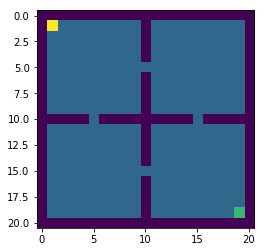

In [0]:
env.render()
plt.show()

## Loading saved data and visualize results
The running time for our project is ~1 day. Therefore for the sake of visualization we have uploaded the saved weights and data 

VAE
* Input: mnist image with size 28 X 28
* Output: embedding representation with size 32 X 1
* Upload the trained VAE 

In [0]:
in_channels = 1
embedding_size = 32
in_height = 28
in_width = 28
vae = VAE(in_channels,embedding_size,in_height,in_width)
vae.load_state_dict(torch.load('../weights/VAE/VAE_rooms_mnist.pt'))

<All keys matched successfully>

Calulate the state embedding representation using the trained VAE encoder

In [0]:
n_states = env.n_states
VAE_reps = np.zeros([n_states,embedding_size])
VAE_labels = []
for i,(state,obs) in enumerate(env.state_dict.items()):
    obs = torch.tensor(obs).permute(2,0,1) #(H,W,C)->(C,H,W)
    obs = obs.unsqueeze(0)
    with torch.no_grad():
        mu, logvar = vae.encoder(obs)
        state_embedding = torch.cat([mu, logvar],1)
        state_embedding = state_embedding.squeeze()
        state_embedding = state_embedding.cpu().numpy()
    VAE_reps[i,:] = state_embedding
    # different label for each room
    if state[0] < room_size + 1 and state[1] < room_size + 1:
        label = 0
    elif state[0] > room_size + 1 and state[1] < room_size + 1:
        label = 1
    elif state[0] < room_size + 1 and state[1] > room_size + 1:
        label = 2
    elif state[0] > room_size + 1 and state[1] > room_size + 1:
        label = 3
    else:
        label = 4
    VAE_labels.append(label)

### Visualize VAE Representation

In [0]:
colors = ['green','blue','red','purple','orange']

Loading the saved representation results when we used random projection and SR representation in addition to their corresponding labels

In [0]:
emb_reps = np.load('../results/MFEC_SR/random_TD_mnist_200epochs_3knn_emb_reps.npy')
SR_reps = np.load('../results/MFEC_SR/random_TD_mnist_200epochs_3knn_SR_reps.npy')
labels = np.load('../results/MFEC_SR/random_TD_mnist_200epochs_3knn_labels.npy')

We have represented multidimensional scaling of VAE, random and SR representation

In [0]:
mds_vae = MDS(n_components=2)
mds_vae_2d = mds_vae.fit_transform(VAE_reps)

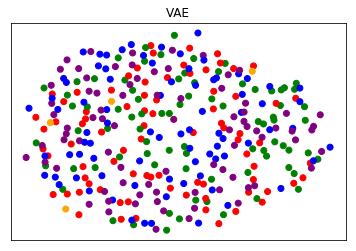

In [0]:
plt.scatter(mds_vae_2d[:,0],mds_vae_2d[:,1],c=labels,cmap=ListedColormap(colors))
plt.title("VAE")
plt.tick_params(          
    axis='both',
    which='both',
    bottom=False,
    top=False, 
    left=False,
    labelbottom=False,
    labelleft=False)
plt.ticklabel_format(style='plain',useOffset=False)
plt.savefig("figures/mds_VAE.png",bbox_inches = 'tight',pad_inches = 0.1,dpi=100)
plt.show()

## Visualize Random Representations

In [0]:
mds_emb = MDS(n_components=2)
mds_emb_2d = mds_emb.fit_transform(emb_reps)

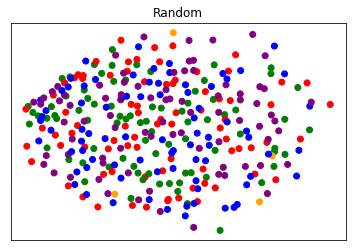

In [0]:
plt.scatter(mds_emb_2d[:,0],mds_emb_2d[:,1],c=labels,cmap=ListedColormap(colors))
plt.title("Random")
plt.tick_params(          
    axis='both',
    which='both',
    bottom=False,
    top=False, 
    left=False,
    labelbottom=False,
    labelleft=False)
plt.ticklabel_format(style='plain',useOffset=False)
plt.savefig("figures/mds_rand.png",bbox_inches = 'tight',pad_inches = 0.1,dpi=100)
plt.show()

## Visualize SR Representation

In [0]:
mds_sr = MDS(n_components=2)
mds_sr_2d = mds_sr.fit_transform(SR_reps)

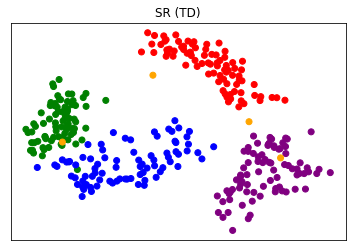

In [0]:
plt.scatter(mds_sr_2d[:,0],mds_sr_2d[:,1],c=labels,cmap=ListedColormap(colors))
plt.title("Estimated SR (TD)")
plt.tick_params(          
    axis='both',
    which='both',
    bottom=False,
    top=False, 
    left=False,
    labelbottom=False,
    labelleft=False)
plt.ticklabel_format(style='plain',useOffset=False)
plt.savefig("figures/mds_SR_TD.png",bbox_inches = 'tight',pad_inches = 0.1,dpi=100)
plt.show()

## Principal Component Analysis (PCA)

In addition to MDS, we also used PCA to represent our embedding representation

In [0]:
pca_emb = PCA(n_components=2)
pca_emb_2d = pca_emb.fit_transform(emb_reps)
pca_sr = PCA(n_components=2)
pca_sr_2d = pca_sr.fit_transform(SR_reps)

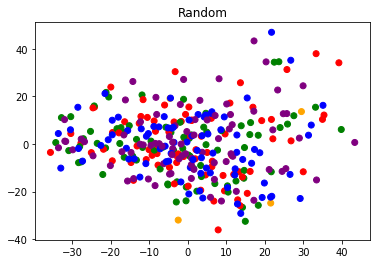

In [0]:
plt.scatter(pca_emb_2d[:,0],pca_emb_2d[:,1],c=labels,cmap=ListedColormap(colors))
#plt.title("Embeddings (MDS)")
plt.title("Random")
plt.show()

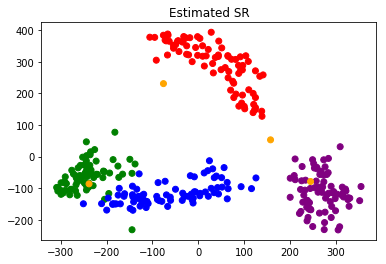

In [0]:
plt.scatter(pca_sr_2d[:,0],pca_sr_2d[:,1],c=labels,cmap=ListedColormap(colors))
plt.title("Estimated SR")
plt.show()

Both MDS and PCA showed how SR has more meaningful temporal abstract information compare to random and VAE embedding representations

## Train results

We uploaded the saved data for random, VAE and SR representation

### Forced KNN

In [0]:
rand_knn = np.load('../results/MFEC/MFEC_rand_rooms_mnist_knn.npy')
VAE_knn = np.load('../results/MFEC/MFEC_VAE_rooms_mnist_knn.npy')
SR_DP_knn = np.load('../results/MFEC_SR/MFEC_SR_rand_DP_rooms_mnist_knn.npy')
SR_TD_knn = np.load('../results/MFEC_SR/MFEC_SR_rand_TD_rooms_mnist_200epochs_knn.npy')

In [0]:
window = 50
smoothed_rand_knn = np.convolve(rand_knn[:,2], np.ones((window,))/window, mode='valid')
smoothed_VAE_knn = np.convolve(VAE_knn[:,2], np.ones((window,))/window, mode='valid')
smoothed_SR_DP_knn = np.convolve(SR_DP_knn[:,2], np.ones((window,))/window, mode='valid')
smoothed_SR_TD_knn = np.convolve(SR_TD_knn[:,2], np.ones((window,))/window, mode='valid')

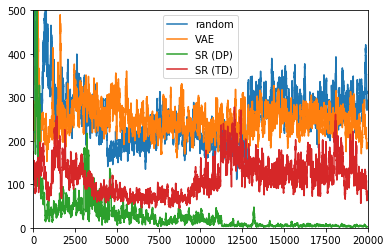

In [0]:
plt.plot(smoothed_rand_knn)
plt.plot(smoothed_VAE_knn)
plt.plot(smoothed_SR_DP_knn)
plt.plot(smoothed_SR_TD_knn)
plt.xlim([0,20000])
plt.ylim([0,500])
plt.legend(["random","VAE", "SR (DP)", "SR (TD)"])
plt.show()

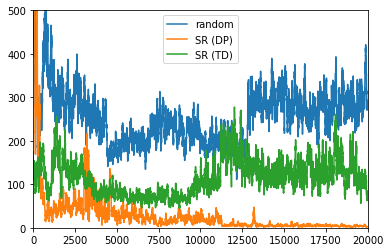

In [0]:
plt.plot(smoothed_rand_knn)
plt.plot(smoothed_SR_DP_knn)
plt.plot(smoothed_SR_TD_knn)
plt.xlim([0,20000])
plt.ylim([0,500])
plt.legend(["random", "SR (DP)", "SR (TD)"])
plt.show()

### Forced KNN, 3 neighbors

In [0]:
rand_3knn = np.load('../results/MFEC/MFEC_rand_rooms_mnist_3knn.npy')
VAE_3knn = np.load('../results/MFEC/MFEC_VAE_rooms_mnist_3knn.npy')
SR_DP_3knn = np.load('../results/MFEC_SR/MFEC_SR_rand_DP_rooms_mnist_3knn.npy')
SR_TD_3knn = np.load('../results/MFEC_SR/MFEC_SR_rand_TD_rooms_mnist_200epochs_3knn.npy')

In [0]:
window = 100
smoothed_rand_3knn = np.convolve(rand_3knn[:,2], np.ones((window,))/window, mode='valid')
smoothed_VAE_3knn = np.convolve(VAE_3knn[:,2], np.ones((window,))/window, mode='valid')
smoothed_SR_DP_3knn = np.convolve(SR_DP_3knn[:,2], np.ones((window,))/window, mode='valid')
smoothed_SR_TD_3knn = np.convolve(SR_TD_3knn[:,2], np.ones((window,))/window, mode='valid')

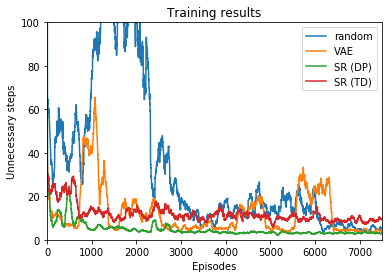

In [0]:
plt.plot(smoothed_rand_3knn)
plt.plot(smoothed_VAE_3knn)
plt.plot(smoothed_SR_DP_3knn)
plt.plot(smoothed_SR_TD_3knn)
plt.title("Training results")
plt.xlabel("Episodes")
plt.ylabel("Unnecessary steps")
plt.xlim([0,7500])
plt.ylim([0,100])
plt.legend(["random","VAE","SR (DP)", "SR (TD)"])
plt.savefig("figures/train_curves.png",bbox_inches = 'tight',pad_inches = 0,dpi=100)
plt.show()

Average number of extra steps throughout training:

In [0]:
print("Random:", np.mean(rand_3knn[:7500,2]))
print("VAE:", np.mean(VAE_3knn[:7500,2]))
print("SR (DP):", np.mean(SR_DP_3knn[:7500,2]))    
print("SR (TD):", np.mean(SR_TD_3knn[:7500,2]))  

Random: 35.217866666666666
VAE: 12.92
SR (DP): 8.163733333333333
SR (TD): 12.6072


Average number of extra steps in the last 100 episodes

In [0]:
print("Random:", np.mean(rand_3knn[7400:7500,2]))
print("VAE:", np.mean(VAE_3knn[7400:7500,2]))
print("SR (DP):", np.mean(SR_DP_3knn[7400:7500,2]))    
print("SR (TD):", np.mean(SR_TD_3knn[7400:7500,2]))  

Random: 4.3
VAE: 4.46
SR (DP): 3.24
SR (TD): 9.21


## Running the code for state embedding representations 
(not using the saved data)

In [0]:
#MFEC_SR_rand_TD_rooms_mnist_200epochs_3knn

!python train.py \
--seed 1 \
--environment_type fourrooms \
--room_size 9 \
--fourrooms_state_type mnist \
--frames_to_stack 1 \
--n_episodes 20000 \
--initial_epsilon 1.0 \
--final_epsilon 0.1 \
--epsilon_decay 0.9 \
--gamma 0.99 \
--Q_train_algo MC \
--use_Q_max \
--force_knn \
--weight_neighbors \
--delta 0.01 \
--SR_gamma 0.99 \
--SR_batch_size 64 \
--SR_train_frames 1000000 \
--SR_epochs 200 \
--SR_train_algo TD \
--agent MFEC \
--num_neighbors 3 \
--embedding_type SR \
--SR_embedding_type random \
--embedding_size 32 \
--in_height 28 \
--in_width 28 \
--max_memory 328 \
--n_hidden 100 \
--lr 0.0001 \
--optimizer 'RMSprop' \
--SR_filename ../results/MFEC_SR/random_TD_mnist_200epochs_3knn \
--print_every 20 \
--out_data_file ../results/MFEC_SR/MFEC_SR_rand_TD_rooms_mnist_200epochs_3knn.npy

/Users/Maryam/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Traceback (most recent call last):
  File "train.py", line 9, in <module>
    from models.DND import *
  File "/Users/Maryam/Courses_UCDavis/Winter2020/EEC289A_RL/project/finalVersion_RL_project/PredictiveEpisodicControl/models/DND.py", line 7, in <module>
    from utils.utils import get_optimizer
  File "/Users/Maryam/anaconda3/lib/python3.6/site-packages/utils.py", line 632
    print 'Warning: Unknown file extension. Using fileformat value.'
                                                                   ^
SyntaxError: Missing parentheses in call to 'print'. Did you mean print('Warning: Unknown file extension. Using fileformat value.')?


In [0]:
#MFEC_SR_rand_TD_rooms_mnist_200epochs_3knn

!python train.py \
--seed 1 \
--environment_type fourrooms \
--room_size 9 \
--fourrooms_state_type mnist \
--frames_to_stack 1 \
--n_episodes 20000 \
--initial_epsilon 1.0 \
--final_epsilon 0.1 \
--epsilon_decay 0.9 \
--gamma 0.99 \
--Q_train_algo MC \
--use_Q_max \
--force_knn \
--weight_neighbors \
--delta 0.01 \
--SR_gamma 0.99 \
--SR_batch_size 64 \
--SR_train_frames 1000000 \
--SR_epochs 200 \
--SR_train_algo TD \
--agent MFEC \
--num_neighbors 3 \
--embedding_type SR \
--SR_embedding_type random \
--embedding_size 32 \
--in_height 28 \
--in_width 28 \
--max_memory 328 \
--n_hidden 100 \
--lr 0.0001 \
--optimizer 'RMSprop' \
--SR_filename ../results/MFEC_SR/random_TD_mnist_200epochs_3knn \
--print_every 20 \
--out_data_file ../results/MFEC_SR/MFEC_SR_rand_TD_rooms_mnist_200epochs_3knn.npy

## Running the code for train results
(not using the saved data)

In [0]:
# MFEC_rand_rooms_mnist_3knn

!python train.py \
--seed 1 \
--environment_type fourrooms \
--room_size 9 \
--fourrooms_state_type mnist \
--frames_to_stack 1 \
--n_episodes 20000 \
--initial_epsilon 1.0 \
--final_epsilon 0.1 \
--epsilon_decay 0.9 \
--gamma 0.99 \
--Q_train_algo MC \
--use_Q_max \
--force_knn \
--weight_neighbors \
--delta 0.01 \
--agent MFEC \
--num_neighbors 3 \
--embedding_type random \
--embedding_size 32 \
--in_height 28 \
--in_width 28 \
--max_memory 328 \
--print_every 20 \
--out_data_file ../results/MFEC/MFEC_rand_rooms_mnist_3knn.npy

In [0]:
# MFEC_VAE_rooms_mnist_3knn

python train.py \
--seed 1 \
--environment_type fourrooms \
--room_size 9 \
--fourrooms_state_type mnist \
--frames_to_stack 1 \
--n_episodes 20000 \
--initial_epsilon 1.0 \
--final_epsilon 0.1 \
--epsilon_decay 0.9 \
--gamma 0.99 \
--Q_train_algo MC \
--use_Q_max \
--force_knn \
--weight_neighbors \
--delta 0.01 \
--agent MFEC \
--num_neighbors 3 \
--embedding_type VAE \
--vae_batch_size 4 \
--vae_train_frames 100000 \
--vae_epochs 10 \
--embedding_size 32 \
--in_height 28 \
--in_width 28 \
--max_memory 328 \
--optimizer 'RMSprop' \
--lr 1e-5 \
--print_every 20 \
--vae_print_every 100 \
--load_vae_from weights/VAE/VAE_rooms_mnist.pt \
--out_data_file ../results/MFEC/MFEC_VAE_rooms_mnist_3knn.npy

In [0]:
# MFEC_SR_rand_DP_rooms_mnist_3knn

!python train.py \
--seed 1 \
--environment_type fourrooms \
--room_size 9 \
--fourrooms_state_type mnist \
--frames_to_stack 1 \
--n_episodes 20000 \
--initial_epsilon 1.0 \
--final_epsilon 0.1 \
--epsilon_decay 0.9 \
--gamma 0.99 \
--Q_train_algo MC \
--use_Q_max \
--force_knn \
--weight_neighbors \
--delta 0.01 \
--SR_gamma 0.99 \
--SR_batch_size 32 \
--SR_train_frames 1000000 \
--SR_epochs 10 \
--SR_train_algo DP \
--agent MFEC \
--num_neighbors 3 \
--embedding_type SR \
--SR_embedding_type random \
--embedding_size 32 \
--in_height 28 \
--in_width 28 \
--max_memory 328 \
--n_hidden 100 \
--lr 0.000006 \
--optimizer 'RMSprop' \
--SR_filename ../results/MFEC_SR/random_DP_mnist_3knn \
--print_every 20 \
--out_data_file ../results/MFEC_SR/MFEC_SR_rand_DP_rooms_mnist_3knn.npy

In [0]:
# MFEC_SR_rand_TD_rooms_mnist_200epochs_3knn

!python train.py \
--seed 1 \
--environment_type fourrooms \
--room_size 9 \
--fourrooms_state_type mnist \
--frames_to_stack 1 \
--n_episodes 20000 \
--initial_epsilon 1.0 \
--final_epsilon 0.1 \
--epsilon_decay 0.9 \
--gamma 0.99 \
--Q_train_algo MC \
--use_Q_max \
--force_knn \
--weight_neighbors \
--delta 0.01 \
--SR_gamma 0.99 \
--SR_batch_size 64 \
--SR_train_frames 1000000 \
--SR_epochs 200 \
--SR_train_algo TD \
--agent MFEC \
--num_neighbors 3 \
--embedding_type SR \
--SR_embedding_type random \
--embedding_size 32 \
--in_height 28 \
--in_width 28 \
--max_memory 328 \
--n_hidden 100 \
--lr 0.0001 \
--optimizer 'RMSprop' \
--SR_filename results/MFEC_SR/random_TD_mnist_200epochs_3knn \
--print_every 20 \
--out_data_file ../results/MFEC_SR/MFEC_SR_rand_TD_rooms_mnist_200epochs_3knn.npy